# Machine Learning Anomaly Detection Methods Review

In [14]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv(r'/content/anomaly_data.csv')
df.head()

,temperature
0,61.709539
1,60.480699
2,61.277554
3,61.433556
4,60.613087


<Axes: >

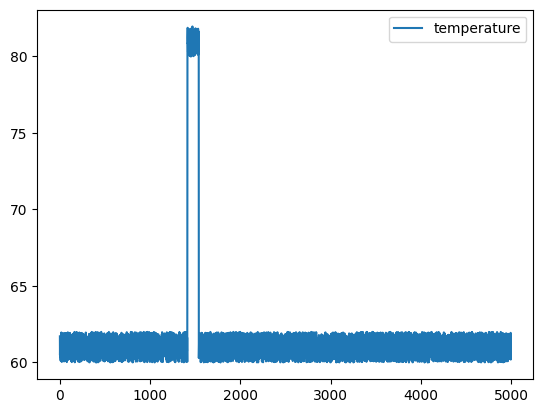

In [17]:
df.plot()

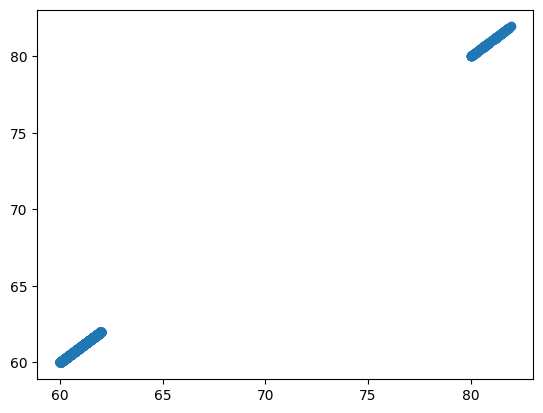

In [18]:
x = df.values
plt.scatter(x,x)

In [19]:
df.describe()

,temperature
count,4999.000000
mean,61.503261
std,3.184584
min,60.000421
25%,60.503838
50%,61.022724
75%,61.540086
max,81.955812


## Local Outlier Factor

In [20]:
x = df.to_numpy()

clf = LocalOutlierFactor(n_neighbors=15)  #algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
pred = clf.fit_predict(df)

pred #-1 values are the outliers/anomalies

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
print('Number of predicted anomalies: ', sum(pred==-1))

Number of predicted anomalies:  17


In [22]:
anomaly_table = df[pred == -1]
anomaly_table

,temperature
360,61.828722
1227,60.130144
1277,61.830184
1419,80.882825
1449,80.866394
1452,80.895224
1708,61.892104
2135,61.893461
2147,60.130911
2477,60.128923


<Axes: >

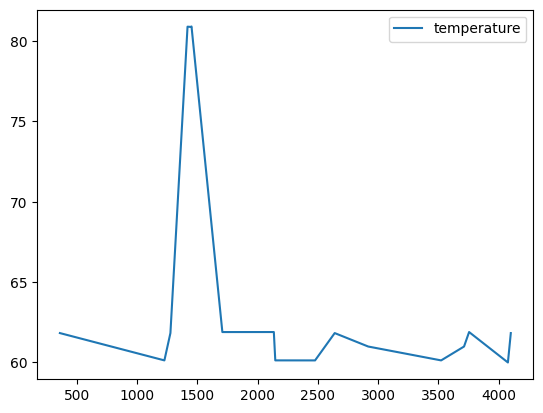

In [23]:
anomaly_table.plot() 

In [24]:
#calculation of the factor values of the every data point
scores = clf.negative_outlier_factor_  #the opposite LOF of the training samples.
scores = np.array(scores, dtype=np.float64)
print(-scores)

[1.3960181  1.07886693 1.05941831 ... 0.99165762 0.98310819 1.03323399]


In [25]:
lof_novel = LocalOutlierFactor(novelty=True)
lof_novel.fit(df)

LocalOutlierFactor(novelty=True)

In [26]:
from numpy import quantile, where, random

thresh = quantile(scores, .03)
print("Threshold:", thresh)

Threshold: -1.2021424771031806


In [27]:
index = where(scores<=thresh)
values = x[index]
print("Anomaly Indexes: \n", index)

Anomaly Indexes: 
 (array([   0,   31,  125,  344,  360,  507,  520,  530,  555,  563,  579,
        643,  653,  704,  732,  788,  874,  924,  945,  963,  989, 1019,
       1111, 1221, 1227, 1229, 1240, 1247, 1277, 1294, 1317, 1386, 1416,
       1418, 1419, 1423, 1425, 1426, 1428, 1432, 1442, 1443, 1449, 1451,
       1452, 1453, 1458, 1459, 1467, 1469, 1477, 1489, 1494, 1500, 1503,
       1511, 1512, 1516, 1517, 1520, 1532, 1537, 1539, 1549, 1624, 1647,
       1657, 1703, 1708, 1780, 1785, 1832, 1964, 1978, 1989, 2061, 2067,
       2104, 2135, 2147, 2166, 2193, 2225, 2240, 2278, 2289, 2310, 2314,
       2406, 2449, 2477, 2551, 2614, 2640, 2653, 2720, 2741, 2792, 2918,
       3109, 3201, 3245, 3263, 3309, 3336, 3354, 3357, 3365, 3409, 3482,
       3523, 3584, 3705, 3713, 3733, 3749, 3753, 3755, 3823, 3869, 3876,
       3878, 3916, 3991, 3997, 4003, 4015, 4032, 4042, 4077, 4101, 4106,
       4253, 4256, 4266, 4310, 4340, 4343, 4357, 4396, 4518, 4522, 4550,
       4569, 4678, 4853, 4905, 

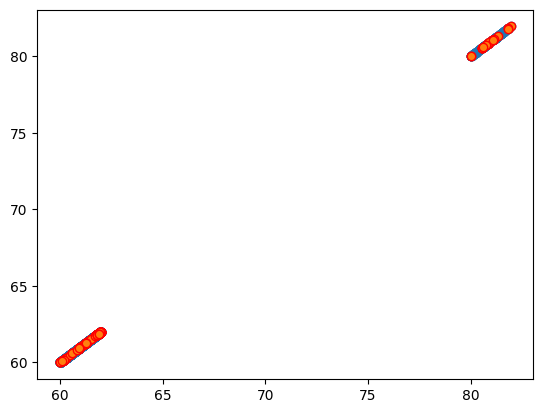

In [28]:
plt.scatter(x[:], x[:])
plt.scatter(x[index], x[index], edgecolors='r')

## Boxplot

The first quartile marks one end of the box and the third quartile marks the other end of the box.

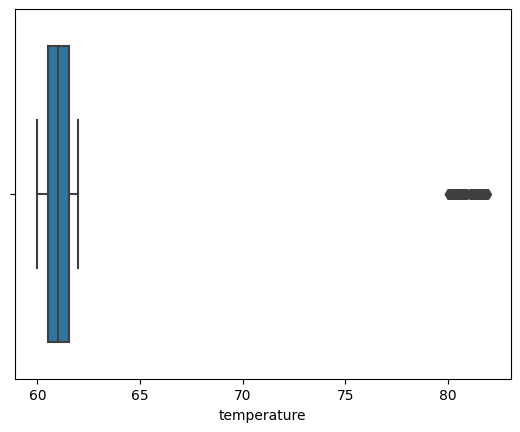

In [29]:
sns.boxplot(x = df["temperature"]);

In [30]:
print("The first quartile: ", sum(Q1))

NameError: ignored

In [31]:
print("The third quartile: ", sum(Q3))

NameError: ignored

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

print("The interquartile range: : ", sum(IQR))

In [32]:
lower_thres = Q1 - 1.5*IQR
upper_thres = Q3 + 1.5*IQR

print("Lower Threshold:", sum(lower_thres))
print("Upper Threshold:", sum(upper_thres))

NameError: ignored

In [ ]:
outliers = df[(df < lower_thres) | (df > upper_thres)]
outliers = outliers.dropna() #dropping the NA values
outliers.head() 

In [ ]:
outliers.info()

In [33]:
total_outlier_rows = outliers.count
total_outlier_rows

NameError: ignored

In [ ]:
print("Number of anomalies: ", len(outliers.index))

In [34]:
print("Anomaly indexes: \n", list(outliers.index))

NameError: ignored

In [ ]:
outliers.plot(color='r')
#plt.savefig('boxplot_outlier_trimmed.png', dpi=200)

## K-Nearest Neighbors 

<Axes: >

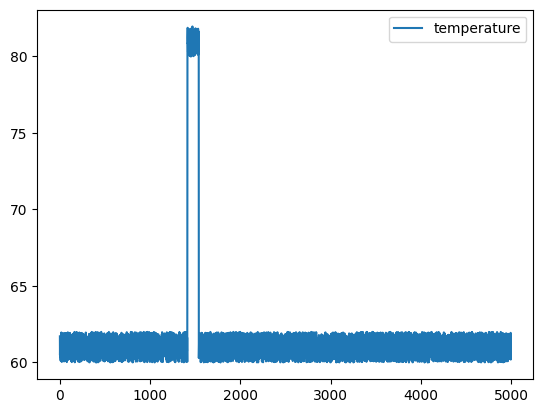

In [35]:
df.plot()

In [36]:
knn = NearestNeighbors(n_neighbors=5, algorithm='auto') #algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
knn.fit(x)

NearestNeighbors()

In [37]:
distances, indexes = knn.kneighbors(x) #distance and index arrays

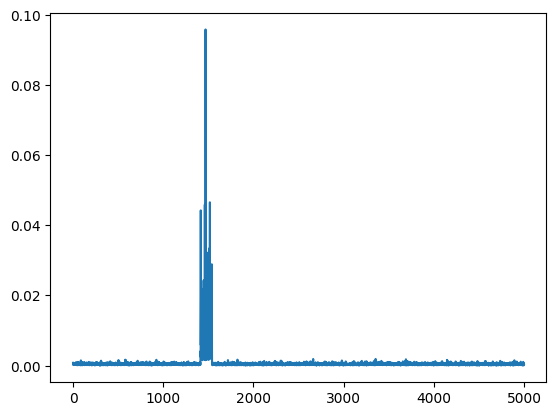

In [38]:
plt.plot(distances.mean(axis=1)) #plotting the distance values

In [39]:
anomaly_index = np.where(distances.mean(axis=1) > .005)
anomaly_index

(array([1415, 1416, 1417, 1418, 1419, 1420, 1421, 1423, 1425, 1426, 1427,
        1428, 1429, 1430, 1431, 1432, 1434, 1436, 1438, 1439, 1440, 1441,
        1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452,
        1453, 1455, 1456, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465,
        1466, 1467, 1469, 1470, 1471, 1472, 1473, 1475, 1476, 1477, 1478,
        1479, 1480, 1481, 1482, 1484, 1485, 1486, 1488, 1489, 1490, 1491,
        1492, 1494, 1495, 1496, 1498, 1499, 1500, 1502, 1503, 1505, 1506,
        1507, 1508, 1509, 1510, 1511, 1512, 1514, 1515, 1516, 1517, 1518,
        1520, 1522, 1523, 1524, 1526, 1527, 1528, 1529, 1530, 1531, 1532,
        1533, 1534, 1535, 1536, 1537, 1538, 1539]),)

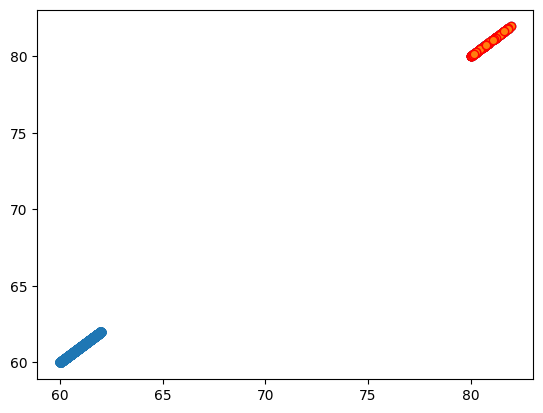

In [40]:
plt.scatter(x[:], x[:]) 
plt.scatter(x[anomaly_index,:], x[anomaly_index,:], edgecolors='r')

## Isolation Forest

In [41]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1))
clf.fit(df)

pred = clf.predict(df)
df['anomaly']=pred 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [42]:
outliers = df.loc[df['anomaly']==-1]
outlier_index = list(outliers.index)

#indexes with a value of -1 are anomaly
outliers

,temperature,anomaly
21,60.034680,-1
46,60.068985,-1
68,60.093135,-1
77,60.027145,-1
88,61.969730,-1
...,...,...
4914,60.009673,-1
4919,60.121914,-1
4929,60.034560,-1
4943,60.118378,-1


In [43]:
print(clf.get_params())

{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [44]:
#printing the value of any index
df.iloc[8]

temperature    60.124879
anomaly         1.000000
Name: 8, dtype: float64

## One Class SVM

In [45]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import matplotlib.pyplot as plt

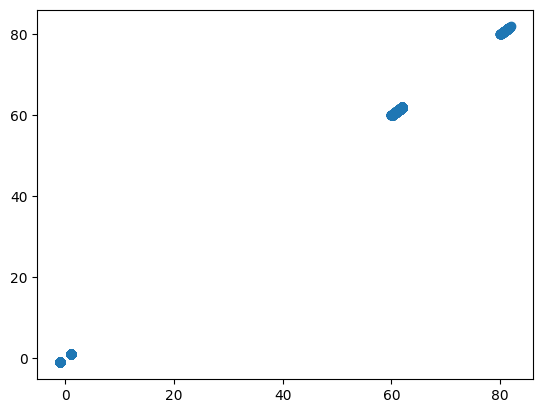

OneClassSVM(gamma='auto')


In [46]:
plt.scatter(df, df)
plt.show()

svm = OneClassSVM(kernel='rbf', gamma='auto',)
print(svm)

In [47]:
svm.fit(df)
pred = svm.predict(df)

In [48]:
anom_index= where(pred==-1)
print("Anomaly indexes: \n", anom_index)

Anomaly indexes: 
 (array([   0,    1,    6, ..., 4990, 4996, 4997]),)


In [49]:
anomaly_scores = svm.score_samples(df)
anomaly_scores

array([1394.50459782, 1458.90174901, 1541.03755661, ..., 1269.12395342,
       1318.92423162, 1555.81824944])